# Flights Data Exploration Challenge

In this challenge, you'll explore a real-world dataset containing flights data from the US Department of Transportation.

Let's start by loading and viewing the data.

In [1]:
import pandas as pd

df_flights = pd.read_csv('data/flights.csv')
df_flights.head()

,Year,Month,DayofMonth,DayOfWeek,Carrier,OriginAirportID,OriginAirportName,OriginCity,OriginState,DestAirportID,DestAirportName,DestCity,DestState,CRSDepTime,DepDelay,DepDel15,CRSArrTime,ArrDelay,ArrDel15,Cancelled
0,2013,9,16,1,DL,15304,Tampa International,Tampa,FL,12478,John F. Kennedy International,New York,NY,1539,4,0.0,1824,13,0,0
1,2013,9,23,1,WN,14122,Pittsburgh International,Pittsburgh,PA,13232,Chicago Midway International,Chicago,IL,710,3,0.0,740,22,1,0
2,2013,9,7,6,AS,14747,Seattle/Tacoma International,Seattle,WA,11278,Ronald Reagan Washington National,Washington,DC,810,-3,0.0,1614,-7,0,0
3,2013,7,22,1,OO,13930,Chicago O'Hare International,Chicago,IL,11042,Cleveland-Hopkins International,Cleveland,OH,804,35,1.0,1027,33,1,0
4,2013,5,16,4,DL,13931,Norfolk International,Norfolk,VA,10397,Hartsfield-Jackson Atlanta International,Atlanta,GA,545,-1,0.0,728,-9,0,0


The dataset contains observations of US domestic flights in 2013, and consists of the following fields:

- **Year**: The year of the flight (all records are from 2013)
- **Month**: The month of the flight
- **DayofMonth**: The day of the month on which the flight departed
- **DayOfWeek**: The day of the week on which the flight departed - from 1 (Monday) to 7 (Sunday)
- **Carrier**: The two-letter abbreviation for the airline.
- **OriginAirportID**: A unique numeric identifier for the departure aiport
- **OriginAirportName**: The full name of the departure airport
- **OriginCity**: The departure airport city
- **OriginState**: The departure airport state
- **DestAirportID**: A unique numeric identifier for the destination aiport
- **DestAirportName**: The full name of the destination airport
- **DestCity**: The destination airport city
- **DestState**: The destination airport state
- **CRSDepTime**: The scheduled departure time
- **DepDelay**: The number of minutes departure was delayed (flight that left ahead of schedule have a negative value)
- **DelDelay15**: A binary indicator that departure was delayed by more than 15 minutes (and therefore considered "late")
- **CRSArrTime**: The scheduled arrival time
- **ArrDelay**: The number of minutes arrival was delayed (flight that arrived ahead of schedule have a negative value)
- **ArrDelay15**: A binary indicator that arrival was delayed by more than 15 minutes (and therefore considered "late")
- **Cancelled**: A binary indicator that the flight was cancelled

Your challenge is to explore the flight data to analyze possible factors that affect delays in departure or arrival of a flight.

1. Start by cleaning the data.
    - Identify any null or missing data, and impute appropriate replacement values.
    - Identify and eliminate any outliers in the **DepDelay** and **ArrDelay** columns.
2. Explore the cleaned data.
    - View summary statistics for the numeric fields in the dataset.
    - Determine the distribution of the **DepDelay** and **ArrDelay** columns.
    - Use statistics, aggregate functions, and visualizations to answer the following questions:
        - *What are the average (mean) departure and arrival delays?*
        - *How do the carriers compare in terms of arrival delay performance?*
        - *Is there a noticable difference in arrival delays for different days of the week?*
        - *Which departure airport has the highest average departure delay?*
        - *Do **late** departures tend to result in longer arrival delays than on-time departures?*
        - *Which route (from origin airport to destination airport) has the most **late** arrivals?*
        - *Which route has the highest average arrival delay?*
        
Add markdown and code cells as required to create your solution.

> **Note**: There is no single "correct" solution. A sample solution is provided in [01 - Flights Challenge.ipynb](01%20-%20Flights%20Solution.ipynb).

In [2]:
df_flights.shape

(271940, 20)

In [3]:
df_flights.describe()

,Year,Month,DayofMonth,DayOfWeek,OriginAirportID,DestAirportID,CRSDepTime,DepDelay,DepDel15,CRSArrTime,ArrDelay,ArrDel15,Cancelled
count,271940.0,271940.000000,271940.000000,271940.000000,271940.000000,271940.000000,271940.000000,271940.000000,269179.000000,271940.000000,271940.000000,271940.000000,271940.000000
mean,2013.0,6.978514,15.814775,3.899316,12744.899584,12739.136493,1325.498713,10.350449,0.201134,1505.477819,6.496650,0.215930,0.010723
std,0.0,1.982431,8.799033,1.987219,1501.199773,1502.569949,470.748546,35.673710,0.400849,493.204020,38.230331,0.411467,0.102995
min,2013.0,4.000000,1.000000,1.000000,10140.000000,10140.000000,1.000000,-63.000000,0.000000,1.000000,-75.000000,0.000000,0.000000
25%,2013.0,5.000000,8.000000,2.000000,11292.000000,11292.000000,920.000000,-4.000000,0.000000,1119.000000,-11.000000,0.000000,0.000000
50%,2013.0,7.000000,16.000000,4.000000,12892.000000,12892.000000,1320.000000,-1.000000,0.000000,1529.000000,-3.000000,0.000000,0.000000
75%,2013.0,9.000000,23.000000,6.000000,14057.000000,14057.000000,1725.000000,9.000000,0.000000,1918.000000,10.000000,0.000000,0.000000
max,2013.0,10.000000,31.000000,7.000000,15376.000000,15376.000000,2359.000000,1425.000000,1.000000,2359.000000,1440.000000,1.000000,1.000000


# Missing value check 

In [4]:
df_flights.isna().sum()

Year                    0
Month                   0
DayofMonth              0
DayOfWeek               0
Carrier                 0
OriginAirportID         0
OriginAirportName       0
OriginCity              0
OriginState             0
DestAirportID           0
DestAirportName         0
DestCity                0
DestState               0
CRSDepTime              0
DepDelay                0
DepDel15             2761
CRSArrTime              0
ArrDelay                0
ArrDel15                0
Cancelled               0
dtype: int64

In [5]:
# checking if by any chance early departures are considered as delays

df_flights[(df_flights['DepDel15'] == 1.0) & (df_flights['DepDelay'] < 0.0)]

,Year,Month,DayofMonth,DayOfWeek,Carrier,OriginAirportID,OriginAirportName,OriginCity,OriginState,DestAirportID,DestAirportName,DestCity,DestState,CRSDepTime,DepDelay,DepDel15,CRSArrTime,ArrDelay,ArrDel15,Cancelled


In [6]:
# showing the features that have null values 
df_flights.isnull().any(axis='rows')

Year                 False
Month                False
DayofMonth           False
DayOfWeek            False
Carrier              False
OriginAirportID      False
OriginAirportName    False
OriginCity           False
OriginState          False
DestAirportID        False
DestAirportName      False
DestCity             False
DestState            False
CRSDepTime           False
DepDelay             False
DepDel15              True
CRSArrTime           False
ArrDelay             False
ArrDel15             False
Cancelled            False
dtype: bool

In [7]:
# showing the features that have null values 
df_flights[df_flights.isnull().any(axis=1)][['DepDelay', 'DepDel15']]

,DepDelay,DepDel15
171,0,NaN
359,0,NaN
429,0,NaN
545,0,NaN
554,0,NaN
...,...,...
271410,0,NaN
271607,0,NaN
271634,0,NaN
271671,0,NaN


In [8]:
# all the delays are actually 0 in this case
df_flights[df_flights.isnull().any(axis=1)]['DepDelay'].describe()

count    2761.0
mean        0.0
std         0.0
min         0.0
25%         0.0
50%         0.0
75%         0.0
max         0.0
Name: DepDelay, dtype: float64

In [9]:
# replace all the None values with 1 where DepDelay is greater than 15, else with 0
df_flights['DepDel15'] = df_flights['DepDel15'].fillna(df_flights['DepDelay']>15)
df_flights.isna().sum()

Year                 0
Month                0
DayofMonth           0
DayOfWeek            0
Carrier              0
OriginAirportID      0
OriginAirportName    0
OriginCity           0
OriginState          0
DestAirportID        0
DestAirportName      0
DestCity             0
DestState            0
CRSDepTime           0
DepDelay             0
DepDel15             0
CRSArrTime           0
ArrDelay             0
ArrDel15             0
Cancelled            0
dtype: int64

In [10]:
df_flights['DepDel15'].value_counts()

0.0    217799
1.0     54141
Name: DepDel15, dtype: int64

## Checking outliers

In [11]:
def show_distribution(data, title='Data distribution'):
    
    from matplotlib import pyplot as plt
    
    min_val = data.min()
    max_val = data.max()
    mean_val = data.mean()
    med_val = data.median()
    mod_val = data.mode()[0]
    print('Minimum:{:.2f}\nMean:{:.2f}\nMedian:{:.2f}\nMode:{:.2f}\nMaximum:{:.2f}\n'.format(min_val,
                                                                                            mean_val,
                                                                                            med_val,
                                                                                            mod_val,
                                                                                            max_val))
    
    # Create a figure for 2 subplots (2 rows, 1 column)
    fig, ax = plt.subplots(2, 1, figsize = (10,4))

    # Plot the histogram   
    ax[0].hist(data)
    ax[0].set_ylabel('Frequency')

    # Add lines for the mean, median, and mode
    ax[0].axvline(x=min_val, color = 'gray', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=mean_val, color = 'cyan', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=med_val, color = 'red', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=mod_val, color = 'yellow', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=max_val, color = 'gray', linestyle='dashed', linewidth = 2)

    # Plot the boxplot   
    ax[1].boxplot(data, vert=False)
    ax[1].set_xlabel('Value')

    # Add a title to the Figure
    fig.suptitle(title)

    # Show the figure
    fig.show()

Minimum:-63.00
Mean:10.35
Median:-1.00
Mode:-3.00
Maximum:1425.00



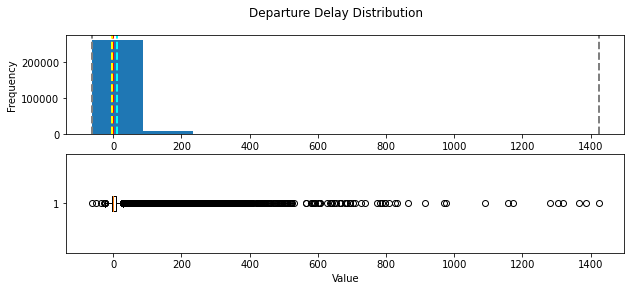

In [12]:
show_distribution(df_flights['DepDelay'], 'Departure Delay Distribution')

Minimum:-75.00
Mean:6.50
Median:-3.00
Mode:0.00
Maximum:1440.00



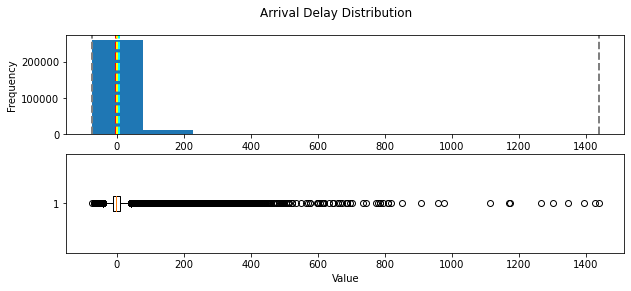

In [13]:
show_distribution(df_flights['ArrDelay'], 'Arrival Delay Distribution')

## Eliminate Outliers

Removing outliers below 1% and above 95% quantiles

Minimum:-11.00
Mean:4.12
Median:-1.00
Mode:-3.00
Maximum:69.00



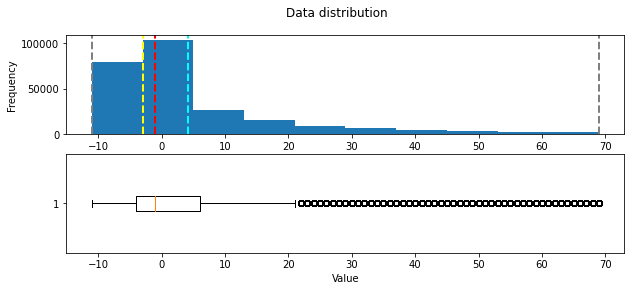

In [14]:
dep_delay_q95 = df_flights.DepDelay.quantile(0.95)
dep_delay_q01 = df_flights.DepDelay.quantile(0.01)
# Get the variable to examine
df_flights = df_flights[df_flights.DepDelay < dep_delay_q95]
df_flights = df_flights[df_flights.DepDelay > dep_delay_q01]
# Call the function
show_distribution(df_flights['DepDelay'])

Minimum:-32.00
Mean:-2.42
Median:-4.00
Mode:0.00
Maximum:38.00



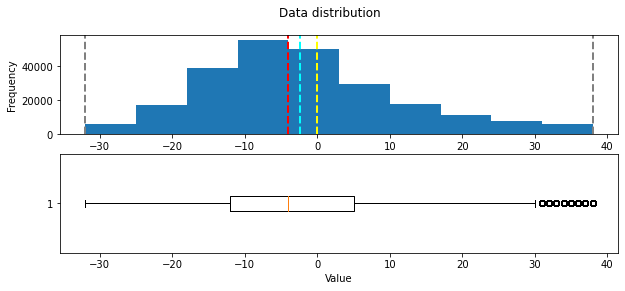

In [15]:
arr_delay_q95 = df_flights.ArrDelay.quantile(0.95)
arr_delay_q01 = df_flights.ArrDelay.quantile(0.01)
# Get the variable to examine
df_flights = df_flights[df_flights.ArrDelay < arr_delay_q95]
df_flights = df_flights[df_flights.ArrDelay > arr_delay_q01]
# Call the function
show_distribution(df_flights['ArrDelay'])

# Explore the cleaned data

## View summary statistics for the numeric fields in the dataset.

In [16]:
df_flights.describe()

,Year,Month,DayofMonth,DayOfWeek,OriginAirportID,DestAirportID,CRSDepTime,DepDelay,CRSArrTime,ArrDelay,ArrDel15,Cancelled
count,239814.0,239814.000000,239814.000000,239814.000000,239814.000000,239814.000000,239814.000000,239814.000000,239814.000000,239814.000000,239814.000000,239814.000000
mean,2013.0,7.009011,15.814882,3.902979,12750.125631,12736.889218,1302.635092,2.140909,1483.690056,-2.420684,0.133658,0.011997
std,0.0,1.998185,8.832182,1.992364,1507.814145,1505.524929,470.009571,10.860213,489.601317,13.684679,0.340285,0.108871
min,2013.0,4.000000,1.000000,1.000000,10140.000000,10140.000000,1.000000,-11.000000,1.000000,-32.000000,0.000000,0.000000
25%,2013.0,5.000000,8.000000,2.000000,11292.000000,11292.000000,900.000000,-4.000000,1107.000000,-12.000000,0.000000,0.000000
50%,2013.0,7.000000,16.000000,4.000000,12892.000000,12892.000000,1300.000000,-1.000000,1505.000000,-4.000000,0.000000,0.000000
75%,2013.0,9.000000,23.000000,6.000000,14057.000000,14057.000000,1707.000000,5.000000,1903.000000,5.000000,0.000000,0.000000
max,2013.0,10.000000,31.000000,7.000000,15376.000000,15376.000000,2359.000000,69.000000,2359.000000,38.000000,1.000000,1.000000


## What are the average (mean) departure and arrival delays?

In [17]:
df_flights[['DepDelay', 'ArrDelay']].mean()

DepDelay    2.140909
ArrDelay   -2.420684
dtype: float64

## How do the carriers compare in terms of arrival delay performance? 

In [18]:
df_flights.groupby(['Carrier'])['DepDelay'].describe()

,count,mean,std,min,25%,50%,75%,max
Carrier,,,,,,,,
9E,6925.0,-0.308592,10.453534,-11.0,-6.0,-3.0,0.0,68.0
AA,25192.0,2.445657,11.199342,-11.0,-4.0,-1.0,5.0,69.0
AS,5945.0,-1.884272,7.798527,-11.0,-6.0,-4.0,0.0,68.0
B6,10191.0,0.885585,11.392182,-11.0,-6.0,-3.0,2.0,65.0
DL,35254.0,0.611108,9.524937,-11.0,-5.0,-2.0,1.0,68.0
EV,13172.0,0.954373,11.525017,-11.0,-6.0,-3.0,2.0,64.0
F9,3077.0,2.162171,10.337385,-11.0,-5.0,-1.0,6.0,58.0
FL,8349.0,2.624027,10.673077,-11.0,-4.0,-1.0,6.0,58.0
HA,1778.0,-2.174916,6.904795,-11.0,-6.0,-4.0,-1.0,51.0


In [61]:
df_flights.groupby('Carrier').agg({'DepDelay': ['mean', 'median', 'std'], 'ArrDelay': ['mean', 'median', 'std']})

DepDelay                    ArrDelay                  
             mean median        std      mean median        std
Carrier                                                        
9E      -0.308592     -3  10.453534 -5.392924     -7  13.610524
AA       2.445657     -1  11.199342 -3.090743     -5  14.266005
AS      -1.884272     -4   7.798527 -2.616484     -3  12.545178
B6       0.885585     -3  11.392182 -3.171426     -5  14.547211
DL       0.611108     -2   9.524937 -4.757304     -7  13.020875
EV       0.954373     -3  11.525017 -3.988916     -6  14.228566
F9       2.162171     -1  10.337385  1.775756      0  12.283115
FL       2.624027     -1  10.673077 -1.428794     -3  13.402262
HA      -2.174916     -4   6.904795 -1.672666     -3   9.594992
MQ       1.795421     -2  11.503549 -1.222012     -3  14.340799
OO      -0.106399     -3  10.102026 -2.181850     -4  12.631489
UA       3.033428     -1  11.418051 -4.879732     -7  14.761080
US      -0.564325     -3   9.239502 -2.366031     -4  13.313434
VX       1.674357     -1  10.275921 -3.285102     -5  13.708260
WN       5.988099      1  11.137136  0.851581     -1  13.020252
YV      -0.213413     -3   9.776511 -2.014879     -4  12.169267

In [64]:
df_flights.groupby('Carrier')['DepDelay'].mean().sort_values()

Carrier
HA   -2.174916
AS   -1.884272
US   -0.564325
9E   -0.308592
YV   -0.213413
OO   -0.106399
DL    0.611108
B6    0.885585
EV    0.954373
VX    1.674357
MQ    1.795421
F9    2.162171
AA    2.445657
FL    2.624027
UA    3.033428
WN    5.988099
Name: DepDelay, dtype: float64

In [65]:
df_flights.groupby('Carrier')['ArrDelay'].mean().sort_values()

Carrier
9E   -5.392924
UA   -4.879732
DL   -4.757304
EV   -3.988916
VX   -3.285102
B6   -3.171426
AA   -3.090743
AS   -2.616484
US   -2.366031
OO   -2.181850
YV   -2.014879
HA   -1.672666
FL   -1.428794
MQ   -1.222012
WN    0.851581
F9    1.775756
Name: ArrDelay, dtype: float64

## Is there a noticable difference in arrival delays for different days of the week?

In [68]:
df_flights.groupby('DayOfWeek').agg({'ArrDelay': ['mean', 'median', 'std']})

ArrDelay                  
               mean median        std
DayOfWeek                            
1         -2.341365     -4  13.660923
2         -3.207608     -5  13.356350
3         -2.255756     -4  13.650102
4         -0.936033     -3  13.937541
5         -1.545851     -3  13.885160
6         -3.959018     -6  13.366173
7         -2.991572     -5  13.662484

In [70]:
df_flights.columns

Index(['Year', 'Month', 'DayofMonth', 'DayOfWeek', 'Carrier',
       'OriginAirportID', 'OriginAirportName', 'OriginCity', 'OriginState',
       'DestAirportID', 'DestAirportName', 'DestCity', 'DestState',
       'CRSDepTime', 'DepDelay', 'DepDel15', 'CRSArrTime', 'ArrDelay',
       'ArrDel15', 'Cancelled'],
      dtype='object')

No, there does not seem to be any significant difference between arrival delays for different days of the week

## Which departure airport has the highest average departure delay?

In [26]:
mean_flight_delay = df_flights.groupby('OriginAirportName').agg({'DepDelay': 'mean'}).sort_values('DepDelay', ascending=False)
mean_flight_delay

,DepDelay
OriginAirportName,
Chicago Midway International,7.394828
William P Hobby,5.855564
Dallas Love Field,5.635000
Baltimore/Washington International Thurgood Marshall,4.706366
Denver International,4.664462
...,...
Tucson International,-0.822222
Richmond International,-0.833996
Kahului Airport,-1.640385


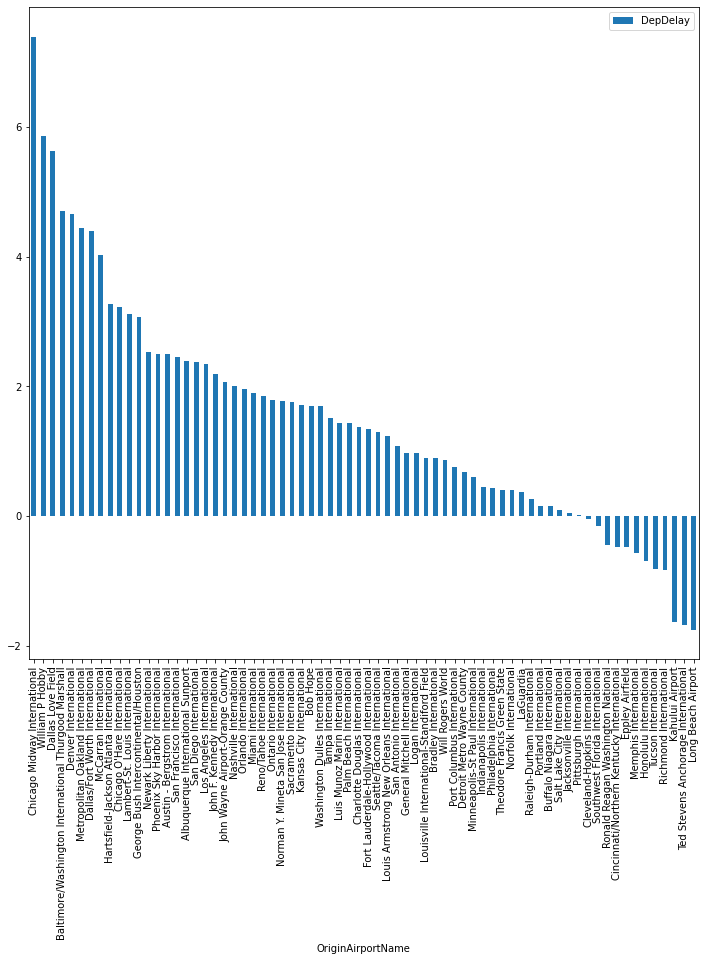

In [27]:
mean_flight_delay.plot(kind = "bar", figsize=(12,12))

## Do late departures tend to result in longer arrival delays than on-time departures? 

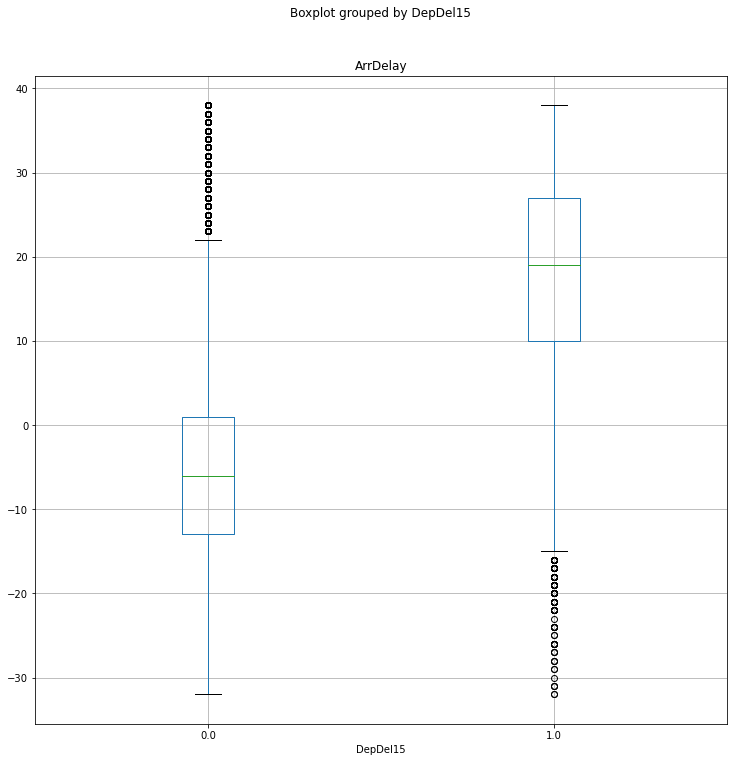

In [28]:
df_flights.boxplot(column='ArrDelay', by='DepDel15', figsize=(12,12))

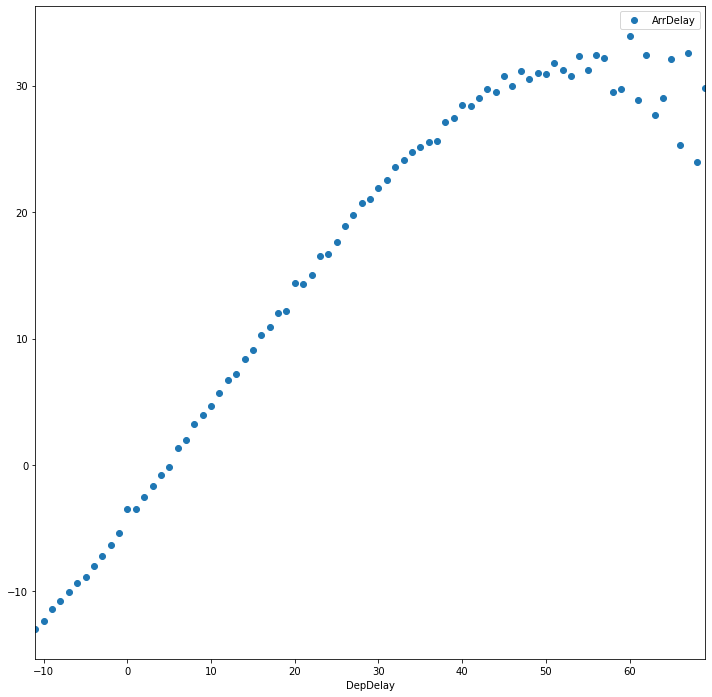

In [53]:
new_df = pd.DataFrame(df_flights.groupby('DepDelay')['ArrDelay'].mean()).reset_index()
new_df.plot(x='DepDelay', y='ArrDelay', style='o', figsize=(12,12))

## Which route (from origin airport to destination airport) has the most late arrivals? 

In [36]:
df_flights.columns

Index(['Year', 'Month', 'DayofMonth', 'DayOfWeek', 'Carrier',
       'OriginAirportID', 'OriginAirportName', 'OriginCity', 'OriginState',
       'DestAirportID', 'DestAirportName', 'DestCity', 'DestState',
       'CRSDepTime', 'DepDelay', 'DepDel15', 'CRSArrTime', 'ArrDelay',
       'ArrDel15', 'Cancelled'],
      dtype='object')

In [39]:
df_flights.groupby(['OriginAirportName', 'DestAirportName'])['ArrDel15'].sum().sort_values(ascending=False)

OriginAirportName             DestAirportName                         
San Francisco International   Los Angeles International                   155
Los Angeles International     San Francisco International                 145
LaGuardia                     Hartsfield-Jackson Atlanta International    100
Los Angeles International     McCarran International                       98
McCarran International        Los Angeles International                    98
                                                                         ... 
Memphis International         Pittsburgh International                      0
Kahului Airport               Ted Stevens Anchorage International           0
Raleigh-Durham International  Indianapolis International                    0
Memphis International         Minneapolis-St Paul International             0
McCarran International        Memphis International                         0
Name: ArrDel15, Length: 2481, dtype: int64

# Which route has the highest average arrival delay?

In [40]:
df_flights.groupby(['OriginAirportName', 'DestAirportName'])['ArrDelay'].mean().sort_values(ascending=False)

OriginAirportName                          DestAirportName                  
Louis Armstrong New Orleans International  Ronald Reagan Washington National    25.333333
Cleveland-Hopkins International            Palm Beach International             18.000000
Denver International                       Raleigh-Durham International         14.851852
Newark Liberty International               Will Rogers World                    13.750000
Charlotte Douglas International            General Mitchell International       13.500000
                                                                                  ...    
Jacksonville International                 Chicago Midway International        -20.000000
Lambert-St. Louis International            Cleveland-Hopkins International     -20.000000
Eppley Airfield                            LaGuardia                           -20.750000
Denver International                       Kahului Airport                     -22.666667
Indianapolis Internatio